<h1 align="center"><font size="4" color='black'> Logistic Regression with Differential Privacy</font></h1>

Importing required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\Jaya Karthi Booven\Desktop\DiffPriv\Dataset\Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Correlation Analysis

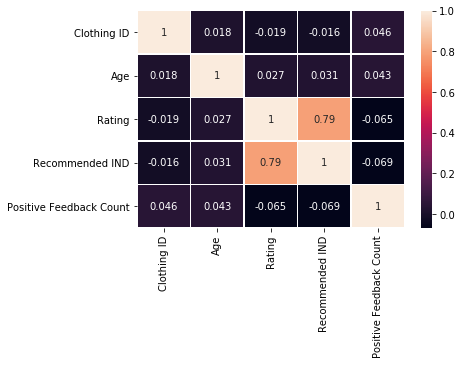

In [6]:
df.drop(df.columns[[0]],axis=1,inplace = True)
sns.heatmap(df.corr(), linewidth=0.5, annot=True)

### Feature Selection

<b>Rating</b>: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.<br><br>
<b>Recommended IND</b>: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [8]:
X = np.asarray(df[['Rating']])
y = np.asarray(df[['Recommended IND']])

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

### Non-private Logistic Regression

<b>Model Training & Prediction</b>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

<br><b>Model Evaluation</b>

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix:

Confusion matrix, without normalization


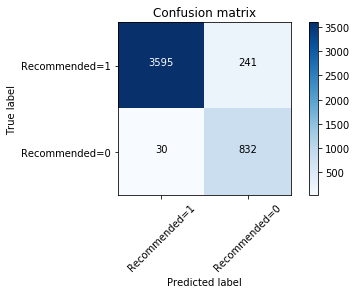

In [15]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Recommended=1','Recommended=0'],normalize= False,  title='Confusion matrix')

Model Evaluation Metrics:

In [17]:
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score

log_loss=log_loss(y_test, yhat_prob)
accuracy=accuracy_score(y_test, yhat)
Jaccard=jaccard_similarity_score(y_test, yhat)
f1_score=f1_score(y_test, yhat, average='weighted')


Prediction accuracy of the Non-private Logistic regression model is 0.9423158790974883 or <b>94.23 %</b>

<br><br>

### Differentially Private Logistic Regression

<b>Model Training & Prediction</b>

In [19]:
from sklearn.model_selection import train_test_split
DP_X_train, DP_X_test, DP_y_train, DP_y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from diffprivlib.models.logistic_regression import LogisticRegression
DP_LR = LogisticRegression(C=0.01, solver='liblinear',epsilon=1).fit(DP_X_train,DP_y_train)
DP_LR

LogisticRegression(C=0.01, data_norm=2.8792894329397156, epsilon=1,
                   fit_intercept=True, max_iter=100, n_jobs=None, tol=0.0001,
                   verbose=0, warm_start=False)

In [20]:
DP_yhat = DP_LR.predict(DP_X_test)
DP_yhat_prob = DP_LR.predict_proba(DP_X_test)

<br><b> Model Evaluation</b>

Confusion Matrix:

Confusion matrix, without normalization


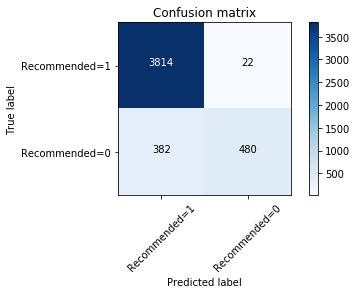

In [105]:
cnf_matrix = confusion_matrix(DP_y_test, DP_yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Recommended=1','Recommended=0'],normalize= False,  title='Confusion matrix')

Model Evaluation Metrics:

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score

DP_log_loss=log_loss(DP_y_test, DP_yhat_prob)
DP_Accuracy=accuracy_score(DP_y_test,DP_yhat)
DP_Jaccard=jaccard_similarity_score(DP_y_test,DP_yhat)
DP_f1_Score=f1_score(DP_y_test, DP_yhat, average='weighted')

Prediction accuracy of the Differentially Private Logistic regression model is 0.9140059599829715 or <b>91.40 %</b>

<br>

### Comparing the models

Comparing the non-private Logistic regression model with the Differentially private regression model based on the Accuracy, F1 Score, Log_loss, and Jaccard Similarity Score.

In [104]:
report_data = {
        'Algorithm': ['Logistic Regression','Logistic Regression with DP'],
        'Accuracy Score':[accuracy,DP_Accuracy],
        'Jaccard Similarity Score': [Jaccard,DP_Jaccard], 
        'F1-score': [f1_score,DP_f1_Score],
        'Log_Loss':[log_loss,DP_log_loss]} 
  
report = pd.DataFrame(report_data) 
report.head()

,Algorithm,Accuracy Score,Jaccard Similarity Score,F1-score,Log_Loss
0,Logistic Regression,0.942316,0.942316,0.944645,0.149325
1,Logistic Regression with DP,0.914006,0.914006,0.904585,0.142780


<br>